In [35]:
#La implementacion de un perceptron
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self, X, y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X, y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1,-1)


In [36]:
import numpy as np
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [37]:
import pandas as pd
#df=pd.read_csv('/home/dcabrerar/Descargas/iris.data',header=None)
df=pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


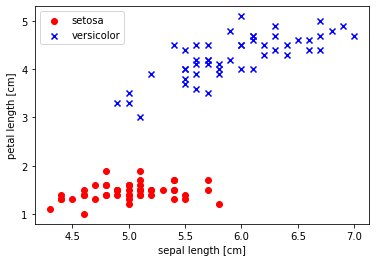

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#seleccionamos setosa y versicolor
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

#Extraemos longitud de sépalo y longitud de pétalo
X=df.iloc[0:100,[0,2]].values

#Representamos los datos
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

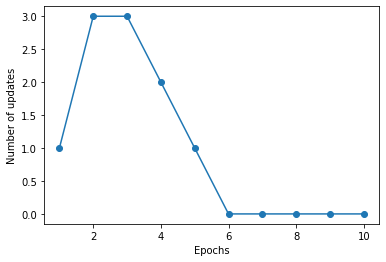

In [39]:
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [40]:
#Funcion de conveniencia para visualizar los limites de decision
#para dos conjuntos de datos bidimensionales

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #definir un generador de marcadores y un mapa de colores
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #representar la superficie de decision
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #representar muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


/tmp/ipykernel_3210/591155275.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


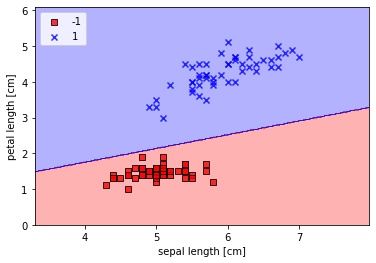

In [41]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [42]:
#Implementación de Adaline
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self, X, y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

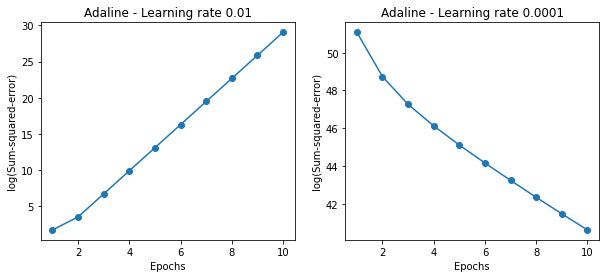

In [43]:
#Implementación de un diagrama de coste contra el numero de epocas
#para 2 rangos de aprendizaje
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1=AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2=AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [44]:
#normalizacion
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

/tmp/ipykernel_3210/591155275.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


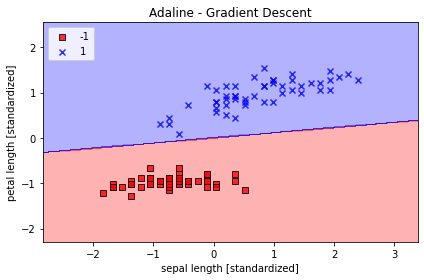

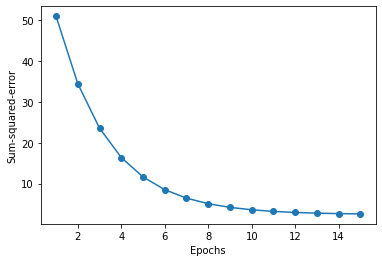

In [45]:
#Volvemos a entrenar a Adaline, ahora cpon 15 epocas y un rango de 0.01
ada=AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1),ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [46]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta=eta
        self.n_iter=n_iter
        self.w_initialized=False
        self.shuffle=shuffle
        self.random_satate=random_state
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            if self.shuffle:
                X,y=self._shuffle(X,y)
            cost=[]
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost=sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._inizialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi,target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    def _shuffle(self, X, y):
        r=self.rgen.permutation(len(y))
        return X[r], y[r]
    def _initialize_weights(self, m):
        self.rgen=np.random.RandomState(self.random_satate)
        self.w_=self.rgen.normal(loc=0.0, scale=0.01,size=1+m)
        self.w_initialized=True
    def _update_weights(self, xi, target):
        output=self.activation(self.net_input(xi))
        error=(target-output)
        self.w_[1:]+=self.eta*xi.dot(error)
        self.w_[0]+=self.eta*error
        cost=0.5*error**2
        return cost
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

In [47]:
ada=AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std,y)

/tmp/ipykernel_3210/591155275.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


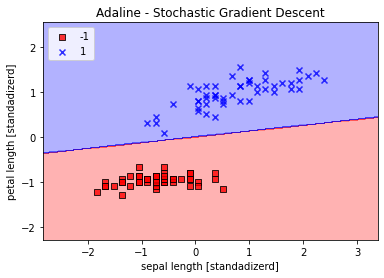

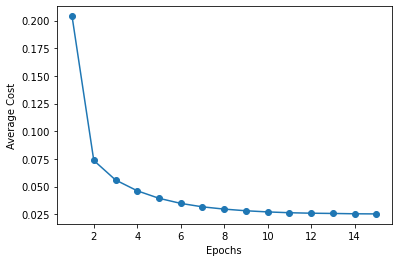

In [48]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standadizerd]')
plt.ylabel('petal length [standadizerd]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()